# Step 1: Import the Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Load the training dataset

In [2]:
df=pd.read_csv("Quote Equity TATAMOTORS.csv")
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Dec-23,EQ,755,802.9,754,753.9,779.4,779.95,785.47,802.9,375.2,"4,11,70,191","32,33,78,28,533.80","5,93,211"
1,28-Dec-23,EQ,742.65,757.95,739.05,740.9,754.85,753.9,748.29,757.95,375.2,"1,49,06,199","11,15,42,32,289.65","2,43,381"
2,27-Dec-23,EQ,728,741.85,725.15,719.55,740.3,740.9,735.95,741.85,375.2,"1,50,52,800","11,07,81,42,060.15","2,88,698"
3,26-Dec-23,EQ,727.4,727.5,716.6,724.7,720,719.55,721.73,734.75,375.2,"72,29,143","5,21,75,10,087.80","1,95,383"
4,22-Dec-23,EQ,716.8,731,712,708.85,725,724.7,724.5,734.75,375.2,"1,20,62,238","8,73,91,00,445.30","2,88,650"


In [3]:
# Remove whitespaces from the column names

df.columns=df.columns.str.strip()

In [4]:
# Sort the data date wise

df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14064\1461993932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
3702,2009-02-02,EQ,148.05,148.05,140,149.65,143.4,143.75,143.71,787.8,124.8,"11,43,658","16,43,54,384.70",-
3701,2009-02-03,EQ,147.7,147.7,132,143.75,134.55,133.2,135.06,787.8,124.8,"32,33,527","43,67,32,255.05",-
3700,2009-02-04,EQ,138,138,132.5,133.2,134.85,135.45,135.77,787.8,124.8,"21,61,527","29,34,71,295.90",-
3699,2009-02-05,EQ,131.3,132.45,129.2,135.45,131,131.1,130.91,787.8,124.8,"21,11,037","27,63,58,849.85",-
3698,2009-02-06,EQ,132,139.7,132,131.1,137.8,137.5,137.15,787.8,124.8,"19,38,748","26,58,96,956.10",-


In [7]:
# check the shape of the data

df.shape

(3703, 14)

In [8]:
#check null values if any in the data

df.isnull().values.any()

False

In [9]:
#remove series column, since it is not needed

column_name_to_delete='series'
df=df.drop(column_name_to_delete,axis=1)
df

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
3702,2009-02-02,148.05,148.05,140,149.65,143.4,143.75,143.71,787.8,124.8,"11,43,658","16,43,54,384.70",-
3701,2009-02-03,147.7,147.7,132,143.75,134.55,133.2,135.06,787.8,124.8,"32,33,527","43,67,32,255.05",-
3700,2009-02-04,138,138,132.5,133.2,134.85,135.45,135.77,787.8,124.8,"21,61,527","29,34,71,295.90",-
3699,2009-02-05,131.3,132.45,129.2,135.45,131,131.1,130.91,787.8,124.8,"21,11,037","27,63,58,849.85",-
3698,2009-02-06,132,139.7,132,131.1,137.8,137.5,137.15,787.8,124.8,"19,38,748","26,58,96,956.10",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,716.8,731,712,708.85,725,724.7,724.5,734.75,375.2,"1,20,62,238","8,73,91,00,445.30","2,88,650"
3,2023-12-26,727.4,727.5,716.6,724.7,720,719.55,721.73,734.75,375.2,"72,29,143","5,21,75,10,087.80","1,95,383"
2,2023-12-27,728,741.85,725.15,719.55,740.3,740.9,735.95,741.85,375.2,"1,50,52,800","11,07,81,42,060.15","2,88,698"
1,2023-12-28,742.65,757.95,739.05,740.9,754.85,753.9,748.29,757.95,375.2,"1,49,06,199","11,15,42,32,289.65","2,43,381"


In [10]:
# Remove commmas from the required columns

df['VOLUME']=df['VOLUME'].str.replace(',',"")
df['OPEN']=df['OPEN'].str.replace(',',"")
df['HIGH']=df['HIGH'].str.replace(',',"")
df['LOW']=df['LOW'].str.replace(',',"")

df.head()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
3702,2009-02-02,148.05,148.05,140,149.65,143.4,143.75,143.71,787.8,124.8,1143658,"16,43,54,384.70",-
3701,2009-02-03,147.7,147.7,132,143.75,134.55,133.2,135.06,787.8,124.8,3233527,"43,67,32,255.05",-
3700,2009-02-04,138,138,132.5,133.2,134.85,135.45,135.77,787.8,124.8,2161527,"29,34,71,295.90",-
3699,2009-02-05,131.3,132.45,129.2,135.45,131,131.1,130.91,787.8,124.8,2111037,"27,63,58,849.85",-
3698,2009-02-06,132,139.7,132,131.1,137.8,137.5,137.15,787.8,124.8,1938748,"26,58,96,956.10",-


# Step 4: Use the Open sstock price column to train the model

In [11]:
training_set=df.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[['148.05']
 ['147.7']
 ['138']
 ...
 ['728']
 ['742.65']
 ['755']]
(3703, 1)


# Step 5: Normalizing the dataset

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)

scaled_training_set

array([[0.0629973 ],
       [0.06272692],
       [0.05523368],
       ...,
       [0.51100811],
       [0.52232522],
       [0.53186559]])

# Step 6: Creating X_train and y_train data structures

In [13]:
X_train=[]
y_train=[]

for i in range(60,3703):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)

In [14]:
print(X_train.shape)
print(y_train.shape)

(3643, 60)
(3643,)


# Step 7: Reshaping the data

In [15]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(3643, 60, 1)

# Step 8: Importing the crucial libraries for building the model

In [16]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.utils import plot_model

# Step 9: Adding different layers to LSTM

In [17]:
lstm=Sequential()
lstm.add(LSTM(units=50,input_shape=(X_train.shape[1],1),return_sequences=True))
lstm.add(Dropout(0.2))

lstm.add(LSTM(units=50,return_sequences=True))
lstm.add(Dropout(0.2))

lstm.add(LSTM(units=50,return_sequences=True))
lstm.add(Dropout(0.2))

lstm.add(LSTM(units=50))
lstm.add(Dropout(0.2))

lstm.add(Dense(units=1))
lstm.compile(loss='mean_squared_error',optimizer='adam')

# Step 10: Fitting the model

In [18]:
lstm.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100

114/114 [==============================] - 53s 218ms/step - loss: 0.0093
Epoch 2/100
114/114 [==============================] - 25s 215ms/step - loss: 0.0028
Epoch 3/100
114/114 [==============================] - 25s 219ms/step - loss: 0.0025
Epoch 4/100
114/114 [==============================] - 25s 215ms/step - loss: 0.0021
Epoch 5/100
114/114 [==============================] - 25s 220ms/step - loss: 0.0020
Epoch 6/100
114/114 [==============================] - 25s 218ms/step - loss: 0.0019
Epoch 7/100
114/114 [==============================] - 25s 218ms/step - loss: 0.0017
Epoch 8/100
114/114 [==============================] - 25s 218ms/step - loss: 0.0017
Epoch 9/100
114/114 [==============================] - 25s 221ms/step - loss: 0.0017
Epoch 10/100
114/114 [==============================] - 25s 220ms/step - loss: 0.0015
Epoch 11/100
114/114 [==============================] - 25s 218ms/step - loss: 0.0013
Epoch 12/100
114/114 [==============================] - 26s 22

114/114 [==============================] - 25s 216ms/step - loss: 5.1559e-04
Epoch 91/100
114/114 [==============================] - 25s 217ms/step - loss: 5.4521e-04
Epoch 92/100
114/114 [==============================] - 25s 217ms/step - loss: 5.4033e-04
Epoch 93/100
114/114 [==============================] - 24s 215ms/step - loss: 5.5990e-04
Epoch 94/100
114/114 [==============================] - 24s 213ms/step - loss: 5.6324e-04
Epoch 95/100
114/114 [==============================] - 25s 216ms/step - loss: 5.3467e-04
Epoch 96/100
114/114 [==============================] - 25s 216ms/step - loss: 5.3812e-04
Epoch 97/100
114/114 [==============================] - 24s 214ms/step - loss: 4.9925e-04
Epoch 98/100
114/114 [==============================] - 25s 217ms/step - loss: 5.4845e-04
Epoch 99/100
114/114 [==============================] - 24s 213ms/step - loss: 5.3793e-04
Epoch 100/100
114/114 [==============================] - 25s 216ms/step - loss: 5.5096e-04


# Step 11: Extracting the Actual Stock prices of Jan,2024

In [19]:
new_df=pd.read_excel('TATA MOTORS-Jan 2024.xlsx')
new_df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2024-01-31,EQ,865.20,896.50,865.20,858.85,884.80,884.20,882.17,896.50,400.45,"2,45,62,392","21,66,81,38,577.05","4,08,702"
1,2024-01-30,EQ,843.00,885.95,842.85,841.00,864.90,858.85,863.55,885.95,400.45,"1,97,34,613","17,04,18,84,369.10","3,49,849"
2,2024-01-29,EQ,811.85,843.80,811.05,811.85,840.55,841.00,830.88,843.80,400.45,"1,28,23,686","10,65,49,91,884.60","2,50,441"
3,2024-01-25,EQ,814.00,814.15,800.30,810.90,810.55,811.85,809.73,827.60,400.45,"1,01,09,720","8,18,61,65,890.10","1,82,572"
4,2024-01-24,EQ,802.40,812.00,788.50,800.45,811.65,810.90,803.01,827.60,400.45,"72,17,542","5,79,57,67,502.25","1,83,775"


In [20]:
#Remove whitespace from the column names
new_df.columns=new_df.columns.str.strip()

In [ ]:
#deleting the series column

column_name_to_delete='series'
new_df=new_df.drop(column_name_to_delete,axis=1)

In [23]:
#sorting the data as per date

new_df['Date']=pd.to_datetime(new_df['Date'])
new_df=new_df.sort_values(by='Date')
new_df.head()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
21,2024-01-01,785.00,798.7,781.05,779.95,792.0,790.60,791.96,802.9,381.0,"1,25,70,717","9,95,54,54,953.90","2,80,616"
20,2024-01-02,800.50,804.0,779.00,790.60,786.0,784.40,787.89,804.0,381.0,"1,37,91,090","10,86,58,94,988.45","2,92,570"
19,2024-01-03,786.05,790.0,776.25,784.40,782.6,781.45,782.06,804.0,381.0,"85,59,060","6,69,37,35,336.40","2,35,425"
18,2024-01-04,798.00,801.8,791.30,781.45,795.7,795.75,796.06,804.0,381.0,"1,42,98,444","11,38,24,14,604.35","3,11,507"
17,2024-01-05,799.00,805.9,787.10,795.75,792.0,790.95,795.04,805.9,381.0,"1,10,91,198","8,81,79,15,485.35","2,67,335"


In [24]:
#Actual stock price

actual_stock_price=new_df.iloc[:,1:2].values

# Step 12: Preparing the input for the model

In [27]:
df_total=pd.concat((df['OPEN'],new_df['OPEN']),axis=0)
inputs=df_total[len(df_total)-len(new_df)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Step 13: Predicting the values for Jan, 2024 Stock prices

In [28]:
predicted_stock_price=lstm.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 7s 7s/step


# Step 14: Plotting the Actual and Predicted Prices of TATA MOTORS Ltd. 

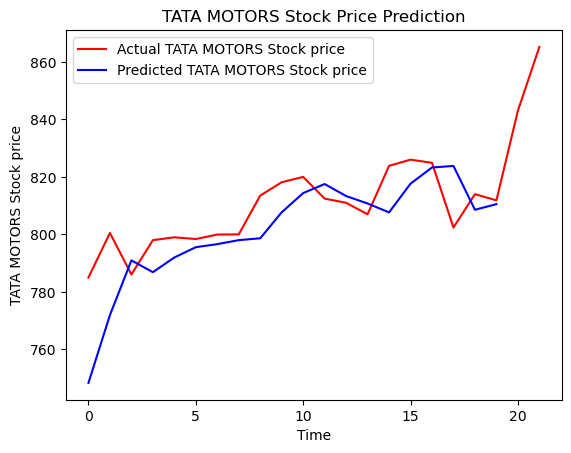

In [30]:
plt.plot(actual_stock_price,color='red',label='Actual TATA MOTORS Stock price')
plt.plot(predicted_stock_price,color='blue',label='Predicted TATA MOTORS Stock price')
plt.title('TATA MOTORS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA MOTORS Stock price')
plt.legend()

# As you can see, the model can predict the trend of the stock prices very closely